<a href="https://colab.research.google.com/github/vamshitn/Samsung-innovation-campus/blob/main/Naive_Bayes_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

In [26]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split


In [27]:
! wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

File ‘car.data’ already there; not retrieving.



In [28]:

#loading the dataset
car_df = pd.read_csv("/content/car.data",
                     names=['buying','maint','doors','persons','lug_boot','safety','class'], sep=",")


In [29]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [30]:
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
car_df_features = car_df.drop(['class'],axis=1)

In [32]:
car_df_features.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [33]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#encoding categorical fetures and target variable
encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(car_df_features)
data_encoded

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

In [34]:
car_df_encoded = pd.DataFrame(data_encoded)
car_df_encoded.head()

,0,1,2,3,4,5
0,3.0,3.0,0.0,0.0,2.0,1.0
1,3.0,3.0,0.0,0.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0
3,3.0,3.0,0.0,0.0,1.0,1.0
4,3.0,3.0,0.0,0.0,1.0,2.0


In [35]:
encoder = LabelEncoder()
target_encoded = encoder.fit_transform(car_df['class'])
car_df_encoded['class'] = target_encoded
car_df_encoded['class']

,class
0,2
1,2
2,2
3,2
4,2
...,...
1723,1
1724,3
1725,2
1726,1


In [36]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(car_df_encoded.drop('class', axis=1), car_df_encoded['class'], test_size=0.3, random_state=143)


In [37]:
#train the model
cnb = CategoricalNB()
cnb.fit(X_train, y_train)


CategoricalNB()

In [38]:

#predicting the data
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)


In [39]:
#roc auc score
roc_auc_score(y_test, y_prob_pred_cnb, multi_class='ovo', average='weighted')

np.float64(0.9666097361759127)

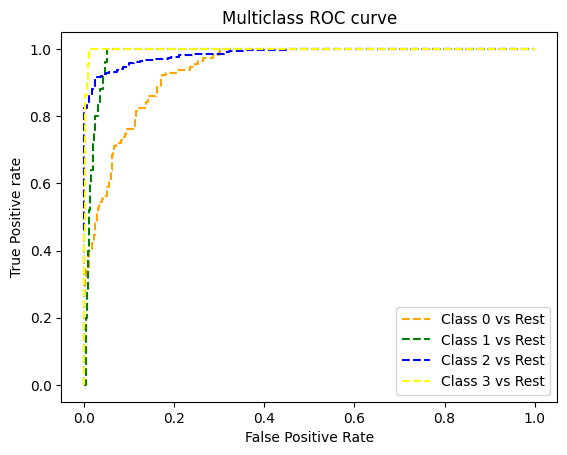

In [40]:
import matplotlib.pyplot as plt

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);